<a href="https://colab.research.google.com/github/Stweel654/Steve_Tweel_STweel_64061-002/blob/main/Assignment_2_CatsDogs_Stephen_Tweel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

**Reading in training, validation, test datasets**

* Step 1: Download the compressed dataset
cats_vs_dogs_small.zip from Canvas. Note: this is a slightly different dataset as the book as it contains 2000 pictures for training, 1000 for validation and 1000 (as opposed to 2000) for testing.

* Step 2: Unzip the file onto your local drive.

* Step 3: Upload your unzipped files (all folders and files) to your Google Drive

Instructions: log into your Google Drive using the same google account of your Google Colab. Find the "Colab Notebooks" folder. Drag the cats_vs_dogs_small folder into the "Colab Notebooks" folder. This should upload all subfolders and pictures onto your Google Drive.

* Step 4: mount your Google Drive within Colab using the following code

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Step 5: find the path of your datafiles in Google Drive. On the left panel of Colab, Click File -> click folder content -> drive -> ...

For example, my path would look like something in the following: "/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small"

Then you can set the path to your files with the following code:

In [127]:
import os, shutil, pathlib

new_base_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")


**Make sure you change my code to your specific machine to have the correct folder.**

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [128]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [129]:
model.summary()

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_13 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Configuring the model for training**

In [130]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [131]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=35)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=10)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=10)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Note the difference in the number of files for the testing dataset.

In [132]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [133]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [134]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [135]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [136]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (35, 180, 180, 3)
labels batch shape: (35,)


**Fitting the model using a `Dataset`**

In [137]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    steps_per_epoch=50,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - accuracy: 0.4976 - loss: 0.7317 - val_accuracy: 0.5000 - val_loss: 0.7048
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.4853 - loss: 0.7018 - val_accuracy: 0.5000 - val_loss: 0.9253
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 230ms/step - accuracy: 0.4871 - loss: 0.7497 - val_accuracy: 0.5140 - val_loss: 0.6922
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.5329 - loss: 0.6957 - val_accuracy: 0.5200 - val_loss: 0.6905
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.5422 - loss: 0.6914 - val_accuracy: 0.6150 - val_loss: 0.6641
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.5625 - loss: 0.6897 - val_accuracy: 0.5170 - val_loss: 0.6861
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.5470 - loss: 0.6821 - val_accuracy: 0.5600 - val_loss: 0.7196
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6023 - loss: 0.6584 - val_accuracy: 

**Displaying curves of loss and accuracy during training**

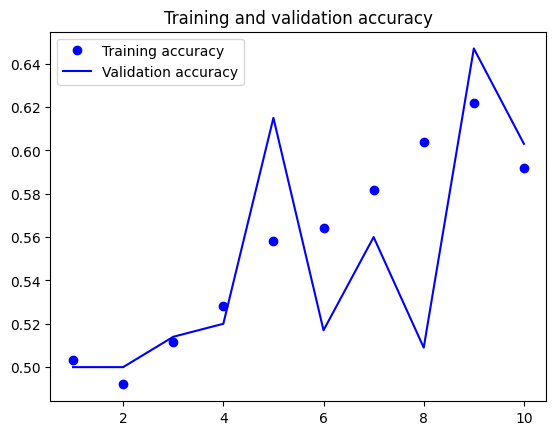

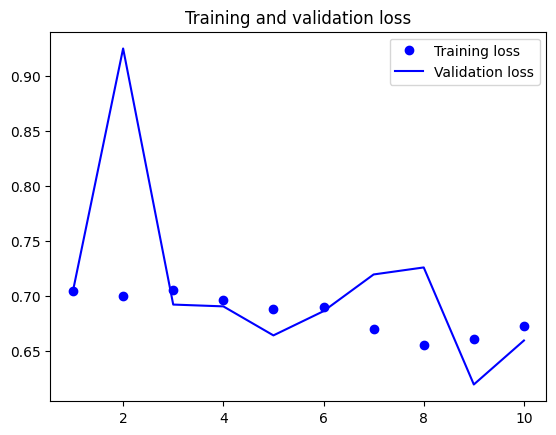

In [138]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [139]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.6638 - loss: 0.6287
Test accuracy: 0.643


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [140]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

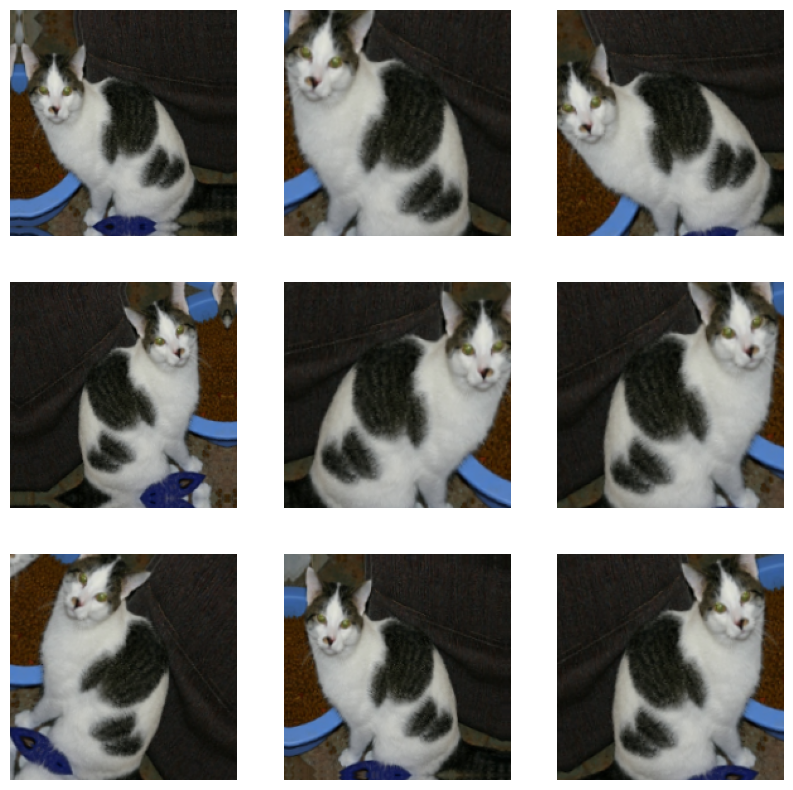

In [141]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [142]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [143]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    steps_per_epoch=10,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 693ms/step - accuracy: 0.4756 - loss: 0.7238 - val_accuracy: 0.5000 - val_loss: 0.7015
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 581ms/step - accuracy: 0.5851 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 618ms/step - accuracy: 0.4873 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6961
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 623ms/step - accuracy: 0.5263 - loss: 0.6976 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 401ms/step - accuracy: 0.5193 - loss: 0.7032 - val_accuracy: 0.6100 - val_loss: 0.6926
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 388ms/step - accuracy: 0.4829 - loss: 0.6928 - val_accuracy: 0.5090 - val_loss: 0.6927
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 683ms/step - accuracy: 0.5092 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 453ms/step - accuracy: 0.5104 - loss: 0.6906 - val_accuracy: 0

**Evaluating the model on the test set**

In [144]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6569 - loss: 0.6331
Test accuracy: 0.640


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [145]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [146]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [147]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [148]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [149]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    steps_per_epoch=10,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7114 - loss: 100.8946 - val_accuracy: 0.9710 - val_loss: 4.4628
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9810 - loss: 2.3374 - val_accuracy: 0.9730 - val_loss: 3.3714
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9895 - loss: 0.7692 - val_accuracy: 0.9740 - val_loss: 3.7340
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9954 - loss: 0.2067 - val_accuracy: 0.9750 - val_loss: 4.1443
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9917 - loss: 0.3069 - val_accuracy: 0.9640 - val_loss: 6.0550
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9098 - loss: 36.1342 - val_accuracy: 0.9800 - val_loss: 4.1514
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9991 - loss: 0.0537 - val_accuracy: 0.9780 - val_loss: 4.2838
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9993 - loss: 0.0342 - val_accuracy: 0.9790

**Plotting the results**

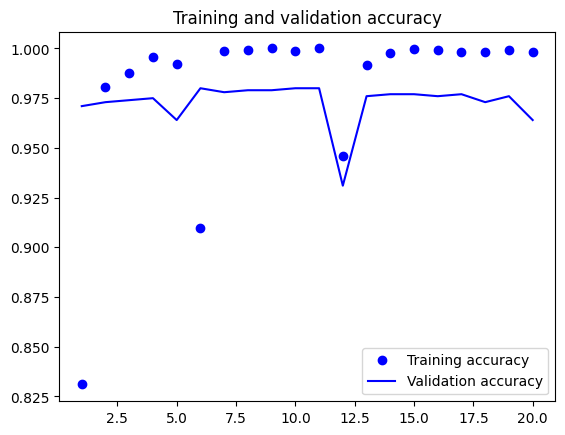

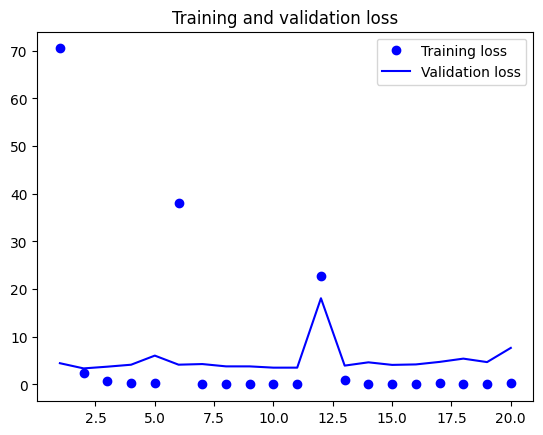

In [150]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [151]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [152]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [153]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [154]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [155]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    steps_per_epoch=10,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 763ms/step - accuracy: 0.6407 - loss: 104.5294 - val_accuracy: 0.9580 - val_loss: 5.5918
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 636ms/step - accuracy: 0.9043 - loss: 11.3920 - val_accuracy: 0.9510 - val_loss: 7.5622
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 745ms/step - accuracy: 0.8967 - loss: 12.3559 - val_accuracy: 0.9700 - val_loss: 3.7494
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 758ms/step - accuracy: 0.9537 - loss: 6.3252 - val_accuracy: 0.9710 - val_loss: 3.4989
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 692ms/step - accuracy: 0.8876 - loss: 12.1864 - val_accuracy: 0.9550 - val_loss: 7.0225
Epoch 6/50
 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9533 - loss: 6.3170

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 588ms/step - accuracy: 0.9522 - loss: 5.9899 - val_accuracy: 0.9740 - val_loss: 4.3104
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 692ms/step - accuracy: 0.9465 - loss: 2.9552 - val_accuracy: 0.9360 - val_loss: 13.3006
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 594ms/step - accuracy: 0.9319 - loss: 10.8483 - val_accuracy: 0.9750 - val_loss: 4.0179
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 686ms/step - accuracy: 0.9699 - loss: 3.6864 - val_accuracy: 0.9730 - val_loss: 4.2724
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 698ms/step - accuracy: 0.9553 - loss: 5.3614 - val_accuracy: 0.9480 - val_loss: 9.7617
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 686ms/step - accuracy: 0.9080 - loss: 11.1315 - val_accuracy: 0.9730 - val_loss: 4.3334
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 651ms/step - accuracy: 0.9348 - loss: 8.6965 - val_accuracy: 0.9180 - val_loss: 19.8415
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 617ms/step - accuracy: 0.9512 - loss: 8.9038 - val_accuracy: 0.97

**Evaluating the model on the test set**

In [156]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9772 - loss: 5.4797
Test accuracy: 0.980


### Fine-tuning a pretrained model

In [157]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)          │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

**Freezing all layers until the fourth from the last**

In [158]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [160]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    steps_per_epoch = 10,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 786ms/step - accuracy: 0.9853 - loss: 2.5241 - val_accuracy: 0.9810 - val_loss: 2.7275
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 777ms/step - accuracy: 0.9703 - loss: 5.1023 - val_accuracy: 0.9810 - val_loss: 2.4127
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 607ms/step - accuracy: 0.9788 - loss: 0.8004 - val_accuracy: 0.9800 - val_loss: 2.4456
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 706ms/step - accuracy: 0.9831 - loss: 1.8515 - val_accuracy: 0.9790 - val_loss: 2.6639
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 705ms/step - accuracy: 0.9646 - loss: 2.9054 - val_accuracy: 0.9780 - val_loss: 2.5033
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 722ms/step - accuracy: 0.9793 - loss: 1.0340 - val_accuracy: 0.9820 - val_loss: 2.2552
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 624ms/step - accuracy: 0.9761 - loss: 1.4671 - val_accuracy: 0.9800 - val_loss: 2.3315
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 599ms/step - accuracy: 0.9676 - loss: 1.2159 - val_accuracy: 0

In [161]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9748 - loss: 3.4511
Test accuracy: 0.976


## Summary